<a href="https://colab.research.google.com/github/vishwvir-singh/DeepLearningForNLP/blob/main/keras_dense_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets.imdb import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import pandas as pd

2.4.0


In [2]:
import os
sentiment_classifier_dir = '/content/sentiment_classifier'
if not os.path.exists(sentiment_classifier_dir):
    os.makedirs(sentiment_classifier_dir)
    print('Directory created successfully !!')
os.chdir(sentiment_classifier_dir)
print('Path ---> ', os.getcwd(), 'ListDirs ---> ' , os.listdir())

Directory created successfully !!
Path --->  /content/sentiment_classifier ListDirs --->  []


In [3]:
#vector space encoding
n_unique_word = 5000 #pick only 5000 words from dataset
skip_n_most_occur_word = 50
max_word_limit = 100
pad_type = trun_type = 'pre'

#Training
emd_dim = 64
n_dense = 64
dropout_value = 0.5
epoch = 4
batch_size = 128

In [4]:
imdb_dataset_actual = load_data()
imdb_dataset = load_data(num_words=n_unique_word, skip_top=skip_n_most_occur_word)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
(x_train, y_train), (x_valid, y_valid) = imdb_dataset

In [6]:
print(x_train[0:6]) # 0 reserved for padding; 1 would be starting character; 2 is unknown; 3 is most common word, etc.

[list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2])
 list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 207, 110, 3103,

In [7]:
print(imdb_dataset_actual[0][0][0:6])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [8]:
word_index = tf.keras.datasets.imdb.get_word_index()
word_index = {k:v+3 for k,v in word_index.items()} #Manually handle 0, 1, 2 Indexes. Pad = 0, except n_unique_words word will change to 2, and 1 is used to show new sentence
word_index['PAD'] = 0
word_index['START'] = 1
word_index['UKN'] = 2  ##Most occur word -- generally are use less i.e. the, is, a , etc
#to convert number to word we need index to word mapping
index_word = {v:k for k,v in word_index.items()}

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
 for sent in x_train[0:6]:
    print([index_word[num] for num in sent])

['UKN', 'UKN', 'UKN', 'UKN', 'UKN', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'UKN', 'part', 'UKN', 'played', 'UKN', 'UKN', 'could', 'UKN', 'imagine', 'being', 'there', 'robert', 'UKN', 'UKN', 'UKN', 'amazing', 'actor', 'UKN', 'now', 'UKN', 'same', 'being', 'director', 'UKN', 'father', 'came', 'UKN', 'UKN', 'same', 'scottish', 'island', 'UKN', 'myself', 'UKN', 'UKN', 'loved', 'UKN', 'fact', 'there', 'UKN', 'UKN', 'real', 'connection', 'UKN', 'UKN', 'UKN', 'UKN', 'witty', 'remarks', 'throughout', 'UKN', 'UKN', 'were', 'great', 'UKN', 'UKN', 'UKN', 'brilliant', 'UKN', 'much', 'UKN', 'UKN', 'bought', 'UKN', 'UKN', 'UKN', 'soon', 'UKN', 'UKN', 'UKN', 'released', 'UKN', 'UKN', 'UKN', 'would', 'recommend', 'UKN', 'UKN', 'everyone', 'UKN', 'watch', 'UKN', 'UKN', 'fly', 'UKN', 'UKN', 'amazing', 'really', 'cried', 'UKN', 'UKN', 'end', 'UKN', 'UKN', 'UKN', 'sad', 'UKN', 'UKN', 'know', 'what', 'UKN', 'say', 'UKN', 'UKN', 'cry', 'UKN', '

In [10]:
for sent in imdb_dataset_actual[0][0][0:6]:
    print([index_word[num] for num in sent])

['START', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', "redford's", 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', "norman's", 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', 'retail', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cr

In [11]:
#Preprocess Data

x_train = pad_sequences(x_train, padding=pad_type, truncating=trun_type, maxlen=max_word_limit)
x_valid = pad_sequences(x_valid, padding=pad_type, truncating=trun_type, maxlen=max_word_limit)
print(imdb_dataset[0][0][0][-100:] == x_train[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [12]:
#Design Neural Network Achitecture

model = Sequential()
model.add(Embedding(input_dim=n_unique_word, output_dim=emd_dim, input_length=max_word_limit))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout_value))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [13]:
# embedding layer dimensions and parameters: 
print(emd_dim, n_unique_word, emd_dim*n_unique_word)

# ...flatten:
print(max_word_limit, emd_dim, emd_dim*max_word_limit)

# ...dense:
print(n_dense, emd_dim*max_word_limit*n_dense + n_dense) # weights + biases

# ...and output:
print(n_dense + 1)

64 5000 320000
100 64 6400
64 409664
65


In [14]:
model.compile(optimizer=tf.keras.optimizers.Nadam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [15]:
modelcheckpoint = ModelCheckpoint(filepath= sentiment_classifier_dir + "/weights.{epoch:02d}.hdf5")

In [16]:
model.fit(x= x_train, y = y_train, batch_size= batch_size, epochs=epoch, verbose=1, validation_data=(x_valid, y_valid), callbacks=modelcheckpoint)

Epoch 1/4
196/196 [==============================] - 5s 12ms/step - loss: 0.6431 - accuracy: 0.5855 - val_loss: 0.3583 - val_accuracy: 0.8416
Epoch 2/4
196/196 [==============================] - 2s 10ms/step - loss: 0.2889 - accuracy: 0.8853 - val_loss: 0.3484 - val_accuracy: 0.8472
Epoch 3/4
196/196 [==============================] - 2s 10ms/step - loss: 0.1266 - accuracy: 0.9650 - val_loss: 0.4294 - val_accuracy: 0.8325
Epoch 4/4
196/196 [==============================] - 2s 12ms/step - loss: 0.0293 - accuracy: 0.9961 - val_loss: 0.5333 - val_accuracy: 0.8267


In [17]:
#Since you have used checkpoints then you should load the weights where you have received less val_loss and high val_accuracy. If val_loss and accuracy are increasing it means we are over fitting model.

#so in here we can see that weights of epoch 2 are perfect for us.

model.get_weights()  ###Default --- weights of final epoch

[array([[-0.00381651, -0.00011605, -0.0033314 , ...,  0.01558343,
         -0.01466183, -0.00638713],
        [-0.04053509,  0.00023309,  0.03643062, ..., -0.01560362,
         -0.02013558, -0.02105451],
        [-0.00113827,  0.00857216, -0.00311051, ..., -0.00520972,
         -0.01764137,  0.00343425],
        ...,
        [-0.01172521, -0.0309516 ,  0.03467025, ...,  0.02974921,
          0.03312327, -0.02746096],
        [-0.04850123,  0.02920745, -0.03188724, ...,  0.04044978,
          0.03619353,  0.0307804 ],
        [ 0.01877861, -0.07156576,  0.01293642, ..., -0.01828024,
          0.09442347,  0.04749263]], dtype=float32),
 array([[ 0.01845437,  0.00428391, -0.01361202, ..., -0.01346045,
          0.01902734, -0.0083605 ],
        [-0.02076091,  0.04982424, -0.05624454, ..., -0.02994901,
          0.01876197,  0.01271705],
        [ 0.02665348,  0.02175783, -0.04030456, ..., -0.06602138,
         -0.01848558, -0.00640472],
        ...,
        [ 0.10117906,  0.09985145, -0.0

In [18]:
model.load_weights(filepath=sentiment_classifier_dir+ '/weights.02.hdf5') ## Replacing final epoch weights with 2nd epoch weights
model.get_weights()

[array([[ 0.02631288,  0.00512799, -0.01612261, ...,  0.0246463 ,
         -0.02303137, -0.01013909],
        [-0.04053509,  0.00023309,  0.03643062, ..., -0.01560362,
         -0.02013558, -0.02105451],
        [-0.01018512,  0.00718964, -0.00314832, ..., -0.00703433,
         -0.01741731,  0.00388084],
        ...,
        [-0.00648206, -0.02603475,  0.04113287, ...,  0.02193984,
          0.02229369, -0.02997793],
        [-0.04690448,  0.01797942, -0.01760292, ...,  0.04302412,
          0.05760852,  0.03347955],
        [ 0.00710724, -0.0511138 ,  0.00722806, ..., -0.00782971,
          0.07346104,  0.03286441]], dtype=float32),
 array([[ 0.03671942,  0.02312078, -0.03177656, ..., -0.01908625,
          0.01509066,  0.00792759],
        [-0.03096507,  0.05635709, -0.03369057, ..., -0.02468538,
          0.0327282 ,  0.01355584],
        [ 0.01437219,  0.00377689, -0.01104469, ..., -0.02745539,
         -0.02869383, -0.02195213],
        ...,
        [ 0.07159834,  0.09537324,  0.0

In [19]:
import numpy as np

weights = model.get_weights()

"""
Layer (type)                 Output Shape              Param #   
=================================================================
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
=================================================================
"""

###Total Layers
print(len(weights))
##weights in layer 1
print(len(weights[0]), np.shape(weights[0]), len(weights[0][0]))
##weights in layer 2
print(len(weights[1]), np.shape(weights[1]))
##weights in layer 3
print(len(weights[2]), np.shape(weights[2]))
##weights in layer 4
print(len(weights[3]), np.shape(weights[3]))
##weights in layer 5
print(len(weights[4]), np.shape(weights[4]))

5
5000 (5000, 64) 64
6400 (6400, 64)
64 (64,)
64 (64, 1)
1 (1,)


In [20]:
#y_hat = model.predict_proba(x_valid) #`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
#print(len(y_hat), y_hat[:10])
y_hat = model.predict(x_valid)
print(len(y_hat), y_hat[:10])

25000 [[0.16721259]
 [0.98007685]
 [0.8590109 ]
 [0.71618176]
 [0.9946903 ]
 [0.83851653]
 [0.7961585 ]
 [0.01112744]
 [0.9378773 ]
 [0.87965727]]


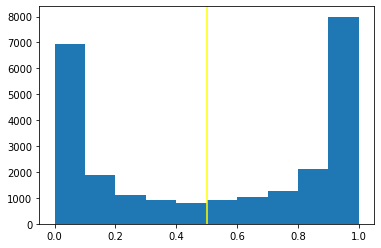

In [29]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color = 'yellow')

In [33]:
percentage_auc = roc_auc_score(y_true=y_valid, y_score=y_hat) * 100.0
print('percentage_auc == {} % '.format(percentage_auc))

percentage_auc == 92.81900416000002 % 


In [38]:
y_df = pd.DataFrame(list(zip(y_valid, [yhat[0] for yhat in y_hat])), columns=['y_true', 'y_predict'])
y_df.head(10)

,y_true,y_predict
0,0,0.167213
1,1,0.980077
2,1,0.859011
3,0,0.716182
4,1,0.994690
5,1,0.838517
6,1,0.796158
7,0,0.011127
8,0,0.937877
9,1,0.879657


In [49]:
y_df[(y_df.y_true == 1) & (y_df.y_predict <= 0.1)]

,y_true,y_predict
101,1,0.045298
248,1,0.091825
300,1,0.063953
322,1,0.098290
333,1,0.052230
...,...,...
24780,1,0.055661
24783,1,0.099237
24789,1,0.074870
24863,1,0.041039


In [51]:
' '.join(index_word[id] for id in imdb_dataset_actual[1][0][322])    #[True ==1 , Predict ==0]

"START this is easily one of the best movies of the 1950s otto preminger directed only four or five really good movies and this is one of them frank sinatra gives his best performance and the music score by elmer bernstein is dynamite from the opening titles by saul bass to the hysteria of drug addict frank going cold turkey this is a riveting movie with kim novak giving a very good performance eleanor parker giving a very bad performance as well as darren mcgavin as the reptilian pusher and arnold as frank's grifter pal beware of bad prints this movie is in the public domain so some copies are pretty rough"

In [47]:
y_df[(y_df.y_true == 0) & (y_df.y_predict > 0.9)]

,y_true,y_predict
8,0,0.937877
112,0,0.924882
256,0,0.970040
386,0,0.957741
390,0,0.928733
...,...,...
24692,0,0.970115
24696,0,0.977577
24771,0,0.903670
24814,0,0.945858


In [54]:
' '.join(index_word[id] for id in imdb_dataset_actual[1][0][24826])   #[True ==0 , Predict ==1]

"START i suppose for 1961 this film was supposed to be cool but looking back now 45 years it's charm was just as silly as it's entertainment value granted the special effects do well on t v with the series that started in 1964 but for the big screen i once had a fish tank that was equally as exciting i must agree about the octopus scene near the end where it attached itself to the obviously not well staged or trained overall it's pretty bad acting with shoddy special effects and i still do recommend it for fun laughs sake this was probably one of irwin allen's biggest films and i think he thought a lot of it eden went on to play genie on t v micheal was her husband now that is a cool part about this film i always enjoyed seeing real life husband and wife teams star in the same movie neat"